# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe

In [3]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df = df.drop('timestamp', axis=1)
df = pd.get_dummies(df, prefix=['uid', 'labname'], columns=['uid', 'labname'])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,6,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,7,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,8,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.to_csv('../data/dayofweek.csv', index=False)

In [30]:
y = df['dayofweek']
naive = np.array([np.argmax(np.bincount(y))] * len(y))
accuracy_score(y, naive)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [99]:
x = df.drop('dayofweek', axis=1)

LogisticRegression(fit_intercept=False, random_state=21)

In [170]:
clf = LogisticRegression(random_state=21, fit_intercept=False)
clf.fit(x, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [171]:
pred = clf.predict(x)
accuracy_score(y, pred)

0.6405693950177936

In [174]:
abs_weights = np.abs(clf.coef_)


In [134]:
def plot_features(coefs, features, n=10):
    fig, ax = plt.subplots(figsize=(15, 8))
    t = dict(zip(features, coefs))
    sp = sorted(t.items(), key=lambda x: (-x[1], x[0]))
    arr = np.array([i[1] for i in sp])[:n]
    col = np.array([i[0] for i in sp])[:n]
    # coefs /= coefs.sum()
    # indices = coefs.argsort()[::-1][:n]
    ax.barh(np.arange(n), 
    arr, 
    color='blue')
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(col)
    ax.invert_yaxis()
    plt.show()

https://stackoverflow.com/questions/51462979/how-to-get-feature-importance-in-logistic-regression-using-weights

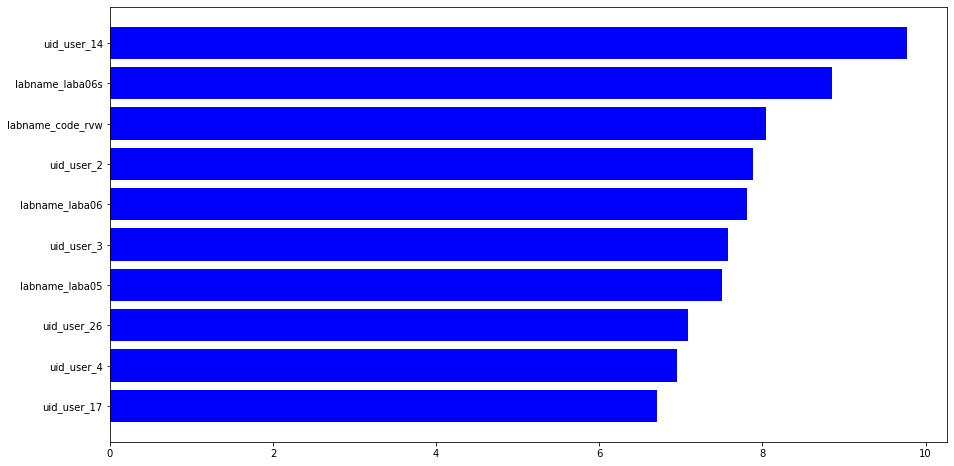

In [187]:
l = abs_weights.sum(axis=0) 
plot_features(l, x.columns)
# l

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [197]:
svc = SVC(probability=True, random_state=21)
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
gs = GridSearchCV(svc, param_grid, scoring='accuracy')
gs.fit(x, y)
gs.best_params_

{'kernel': 'poly'}

In [203]:
svc = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21)).fit(x, y)
svc.fit(x, y)
abs_weights = np.abs(svc.coef_)

C:\Users\flman\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


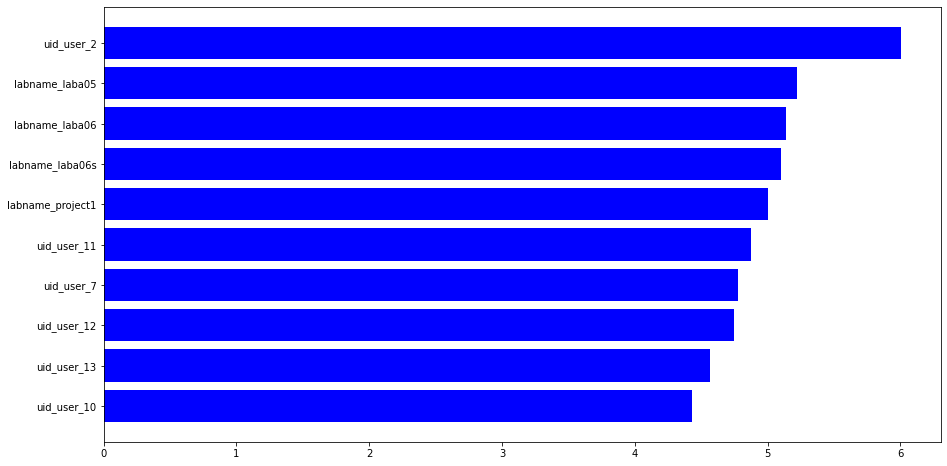

In [204]:
l = abs_weights.sum(axis=0) 
plot_features(l, x.columns)

In [205]:
pred = svc.predict(x)
accuracy_score(y, pred)

0.6126927639383155

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [157]:
dtc = DecisionTreeClassifier(random_state=21)
param_grid = {'max_depth': [4]}
gs = GridSearchCV(dtc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(x, y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [4]}, scoring='accuracy')

In [158]:
gs.best_params_

{'max_depth': 4}

In [160]:
param_grid = {'max_depth': [4, 6, 12]}
gs1 = GridSearchCV(dtc, param_grid, scoring='accuracy', n_jobs=-1)
gs1.fit(x, y)
gs1.best_params_

{'max_depth': 12}

In [161]:
y_pred = gs.predict(x)
accuracy_score(y, y_pred)

0.5516014234875445

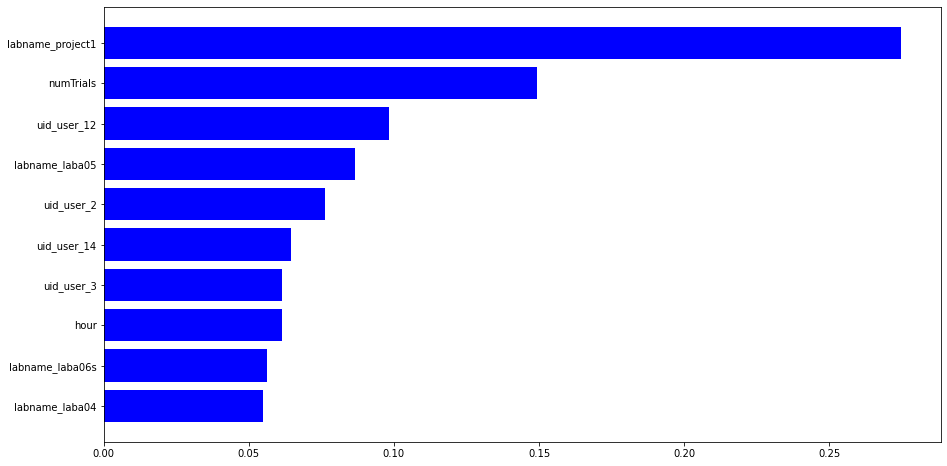

In [159]:
plot_features(gs.best_estimator_.feature_importances_, x.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [206]:
rfc = RandomForestClassifier(random_state=21)
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7, 10, 25]}
gs = GridSearchCV(rfc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(x, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 25],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [207]:
gs.best_params_

{'max_depth': 25, 'n_estimators': 100}

In [208]:
y_pred = gs.predict(x)
accuracy_score(y, y_pred)

1.0

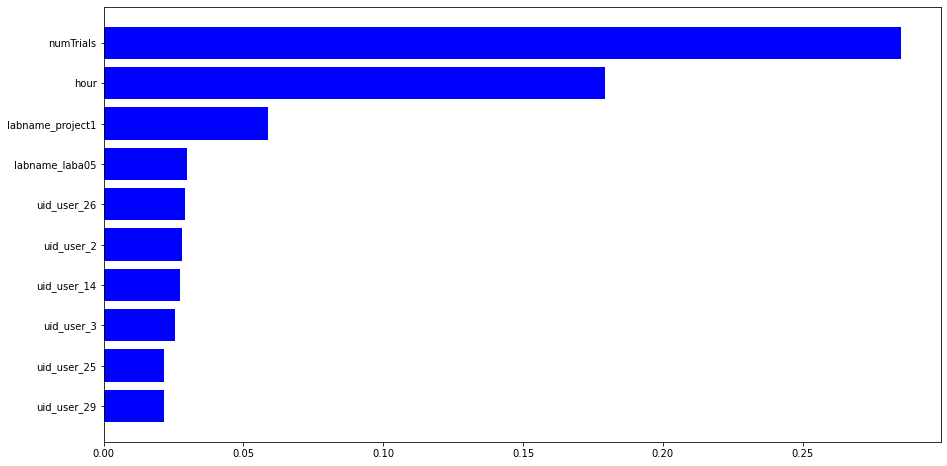

In [209]:
plot_features(gs.best_estimator_.feature_importances_, x.columns)